# Laboratory practice 2.2: KNN classification

Here we will implement our first ML model based on the _very_ popular KNN algorithm. We will use the preprocessed data from the previous practice, `SimData.dat`. The data should be properly cleaned already, and we should have available the two resulting files `train.dat` and `test.dat` with the training and testing data, respectively. Therefore, we will not need to do the preprocessing here, which is why we will (almost) jump to implementing KNN and applying it to the data.

In [1]:
# Load the modules you'll need later

# Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

# Data management libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Add Lab_2_2_kNN.py to the path
import sys
import os 
#sys.path.append('../src')

# Agregar el directorio "src" al path de Python
sys.path.append(os.path.abspath("../src"))

# Import the functions from the solution
#from P2_2_LogReg_KNN_solution import knn, plot_probability_histograms, plot_roc_curve, evaluate_classification_metrics, plot_2Dmodel_predictions, plot_calibration_curve
from Lab_2_2_kNN import knn , plot_probability_histograms, plot_roc_curve, evaluate_classification_metrics, plot_2Dmodel_predictions, plot_calibration_curve


## 1. Prepare the Dataset

This part of the process you already did in the previous practice! You can reuse everything here. Moreover, if you saved the train/test split into `train.dat` and `test.dat`, you can use them here!

In [2]:

# Load the train and test data you generated (use the name "train_df" and "test_df")

# Ruta relativa desde "notebook" al directorio raíz
test_df = pd.read_csv("../test.dat", delimiter="\t")  
train_df = pd.read_csv("../train.dat", delimiter="\t")
print(train_df)
print(test_df)
# Convert output variable to factor

train_df["X1"] = train_df["X1"].astype(float)
train_df["X2"] = train_df["X2"].astype(float)
test_df["X1"] = test_df["X1"].astype(float)
test_df["X2"] = test_df["X2"].astype(float)

train_df["Y"] = train_df["Y"].astype(bool)
test_df["Y"] = test_df["Y"].astype(bool)



             X1        X2  Y
0    107.378782 -7.389331  1
1    319.888683  5.754181  0
2     83.377934 -7.290793  1
3    373.761896 -8.265290  1
4    262.710059 -1.344082  0
..          ...       ... ..
791  507.168168 -5.347802  1
792  151.686186  5.398054  0
793  342.131637 -7.288121  1
794 -239.198510  2.511377  1
795 -208.976868  1.501237  1

[796 rows x 3 columns]
             X1        X2  Y
0   -115.248635  7.353836  0
1    560.638654 -5.679244  1
2   -114.673045 -1.533353  1
3    109.781194 -6.674774  1
4    602.339940 -3.111906  1
..          ...       ... ..
195 -115.659343  7.840985  0
196 -272.799511  2.569798  1
197   28.044476  8.289244  0
198 -208.431752  3.928220  1
199  322.348964  6.712620  0

[200 rows x 3 columns]


In [3]:
# Define input and output variables, and store X_train, X_test, y_train and y_test matrices
input_vars = ['X1','X2']
target_var = 'Y'

X_train = train_df[input_vars]
y_train = train_df[target_var]
X_test = test_df[input_vars]
y_test = test_df[target_var]

## 2. Training of Machine Learning models

#### Minkowski Distance

<center>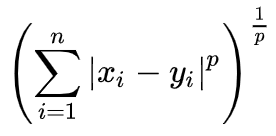</center>

#### k-Nearest Neighbors Model

- [K-Nearest Neighbours](https://scikit-learn.org/stable/modules/neighbors.html#classification)
- [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [4]:
# Inputs of the model. Change accordingly to perform feature selection
INPUTS_KNN = input_vars

# Define hyperparameters of the model
k = 31 # Number of nearest neighbors
p = 2 # Order of Minkowski distance (what distance is this?)

# Create a model object
knn_fit = knn()
print(knn_fit) #vemos que de momento está vacío -> llamamos a la función "fit" para pasarlo los parámetros 

kNN model (k=None, p=None)


In [5]:
# Train model
try : 
    knn_fit.fit(X_train[INPUTS_KNN].values, y_train.values, k=k, p=p)
    print("kNN Trained")
    print(knn_fit)
except ValueError as error: 
    print (error)


kNN Trained
kNN model (k=31, p=2)


 datos predecidos


TypeError: list indices must be integers or slices, not tuple

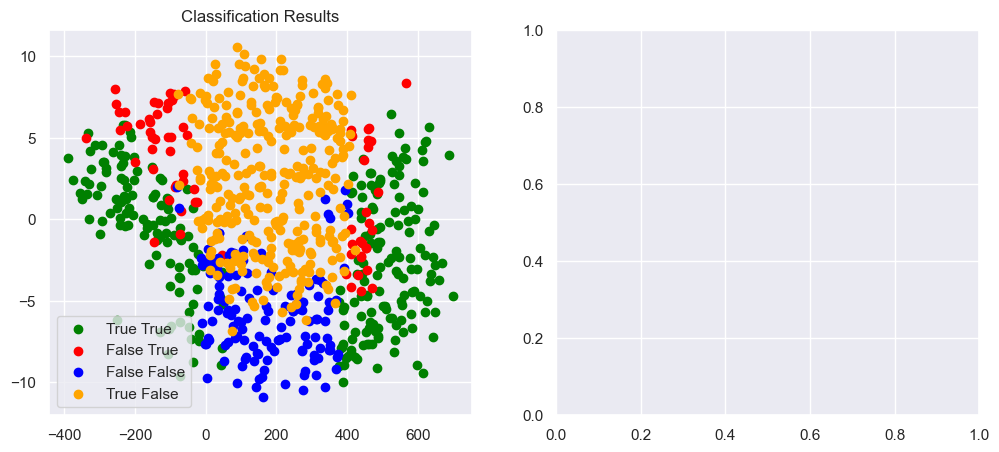

In [6]:
model_predictions = plot_2Dmodel_predictions(X_train[INPUTS_KNN].values, y_train.values, knn_fit, 50)

In [ ]:
# Obtain train performance metrics
evaluate_classification_metrics(y_train, knn_fit.predict(X_train[INPUTS_KNN].values), 'YES')

NameError: name 'tn' is not defined

In [ ]:
# Obtain test performance metrics
evaluate_classification_metrics(y_test, knn_fit.predict(X_test[INPUTS_KNN].values),  'YES')

NameError: name 'tn' is not defined

In [8]:
probs = knn_fit.predict_proba(X_train.values)
probs

[]

In [ ]:
calibration_curve = plot_calibration_curve(y_train.values, probs[:,1], 'YES')

In [ ]:
probability_histograms = plot_probability_histograms(y_train.values, probs[:,1], 'YES')

In [ ]:
roc_curve = plot_roc_curve(y_train.values, probs[:,1], 'YES')